In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [134]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [135]:
df.sample(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31630,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20306,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12327,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
df.shape

(42000, 785)

In [137]:
import matplotlib.pyplot as plt

In [138]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9655,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


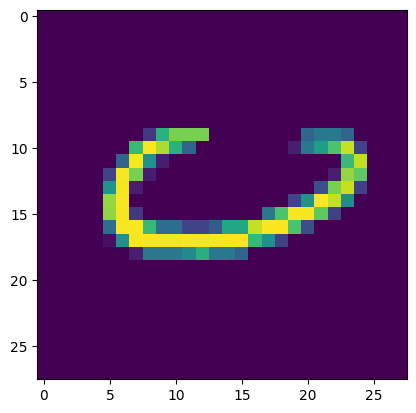

In [139]:
plt.imshow(df.iloc[24824,1:].values.reshape(28,28))

In [140]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
11146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


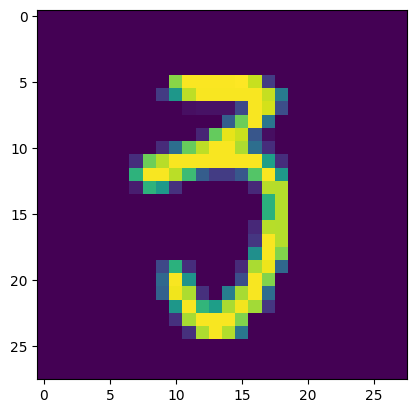

In [141]:
plt.imshow(df.iloc[37846,1:].values.reshape(28,28))

In [142]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
X_train.shape

(33600, 784)

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier()

In [148]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [149]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

13.088215827941895


In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()

In [153]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.fit_transform(X_test)

In [154]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)

In [155]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [156]:
X_train_trf.shape

(33600, 784)

In [157]:
X_train.shape

(33600, 100)

In [158]:
knn = KNeighborsClassifier()

In [159]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [160]:
y_pred = knn.predict(X_test_trf)

In [161]:
accuracy_score(y_test, y_pred)

0.9407142857142857

In [162]:
for i in range(1,20):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf , y_train)
    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_test, y_pred))

0.2639285714285714
0.11666666666666667
0.15119047619047618
0.20976190476190476
0.2667857142857143
0.35619047619047617
0.38535714285714284
0.40273809523809523
0.41583333333333333
0.3886904761904762
0.35642857142857143
0.38107142857142856
0.3763095238095238
0.381547619047619
0.3883333333333333
0.3578571428571429
0.3167857142857143
0.30714285714285716
0.29892857142857143


In [163]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [164]:
X_train_trf

array([[-226.60474699,  305.86759397],
       [  38.33482758, -461.14469984],
       [-305.49343304, -351.6390174 ],
       ...,
       [ -28.00246131,  596.01052587],
       [ 233.97067352,   18.68571687],
       [1096.50261664, -254.68848359]])

In [165]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter( x = X_train_trf[:,0],
                  y = X_train_trf[:,1],
                  color = y_train_trf,
                  color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [166]:
# Transforming in 3d
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [167]:
X_test_trf

array([[-428.42396988,  249.23547694,  221.93182761],
       [-932.22347713,  425.31869711,   65.47350382],
       [-574.93246131, -578.77784428, -104.59519431],
       ...,
       [ 188.95687391, 1015.16576641, -555.72822698],
       [ 527.70771849, -168.69565587,  430.41976519],
       [-256.23063769, -431.92461261, -449.30319318]])

In [168]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x = X_train_trf[:,0], y = X_train_trf[:,1], z = X_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [169]:
pca.explained_variance_
# Eigen values

array([332440.86167183, 250908.6852313 , 207205.14453594])

### Finding out the optimum number of principal component

In [172]:
pca.explained_variance_ratio_

array([0.10589274, 0.07992221, 0.06600127])

In [177]:
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [178]:
pca.explained_variance_

array([332440.86168104, 250908.68538196, 207205.14975678, 183838.84904316,
       168424.52841691, 143125.41421743, 112802.47201413, 100073.23374453,
        93905.84029532,  84244.92610132,  72972.18452442,  71828.55335506,
        59486.93151887,  57723.22433791,  54453.82991164,  50243.55067752,
        45045.38485935,  43957.9865447 ,  41336.0743133 ,  39580.73617068,
        36689.03572936,  33744.23446694,  32795.14907647,  31129.39014029,
        30651.29788157,  29453.27824045,  27399.46749694,  26995.77938651,
        25208.48543155,  23018.33698725,  22466.32049396,  22220.26298559,
        20425.64157859,  20061.72608824,  19477.53649148,  18508.36102208,
        17765.83752494,  17081.82769693,  16578.29465756,  16411.56781769,
        15490.81351973,  15154.5137381 ,  14670.98834353,  13618.51293582,
        13496.13331172,  13027.27055897,  12370.79179733,  12014.12700036,
        11608.52094702,  11402.3165982 ,  11033.6075746 ,  10765.53205913,
        10106.13174263,  

In [179]:
pca.explained_variance_.shape

(100,)

In [180]:
pca.components_.shape

(100, 100)

In [181]:
pca.explained_variance_ratio_

array([0.10589274, 0.07992221, 0.06600128, 0.05855838, 0.05364844,
       0.04558989, 0.03593109, 0.03187643, 0.02991193, 0.02683463,
       0.02324391, 0.02287963, 0.01894844, 0.01838664, 0.01734524,
       0.01600413, 0.01434835, 0.01400198, 0.01316682, 0.01260769,
       0.0116866 , 0.01074859, 0.01044627, 0.00991568, 0.00976339,
       0.00938178, 0.00872758, 0.00859899, 0.00802969, 0.00733206,
       0.00715622, 0.00707784, 0.0065062 , 0.00639028, 0.0062042 ,
       0.00589549, 0.00565897, 0.00544109, 0.0052807 , 0.00522759,
       0.00493431, 0.00482718, 0.00467317, 0.00433792, 0.00429894,
       0.00414959, 0.00394048, 0.00382687, 0.00369767, 0.00363199,
       0.00351455, 0.00342916, 0.00321912, 0.00317964, 0.00310095,
       0.00295978, 0.00290068, 0.00279683, 0.00275129, 0.00270964,
       0.00264124, 0.0025688 , 0.00250678, 0.00238446, 0.00232851,
       0.00224182, 0.00221151, 0.00214992, 0.00210308, 0.00204849,
       0.00202586, 0.00199449, 0.00192195, 0.00184792, 0.00182

In [182]:
np.cumsum(pca.explained_variance_ratio_)

array([0.10589274, 0.18581495, 0.25181623, 0.31037461, 0.36402305,
       0.40961294, 0.44554403, 0.47742047, 0.50733239, 0.53416702,
       0.55741093, 0.58029055, 0.59923899, 0.61762563, 0.63497086,
       0.650975  , 0.66532335, 0.67932533, 0.69249216, 0.70509985,
       0.71678645, 0.72753504, 0.73798131, 0.74789699, 0.75766038,
       0.76704216, 0.77576974, 0.78436874, 0.79239842, 0.79973048,
       0.8068867 , 0.81396454, 0.82047074, 0.82686103, 0.83306523,
       0.83896072, 0.84461969, 0.85006078, 0.85534148, 0.86056907,
       0.86550338, 0.87033056, 0.87500373, 0.87934165, 0.88364059,
       0.88779018, 0.89173066, 0.89555753, 0.8992552 , 0.9028872 ,
       0.90640174, 0.9098309 , 0.91305002, 0.91622965, 0.91933061,
       0.92229038, 0.92519106, 0.92798788, 0.93073917, 0.93344881,
       0.93609005, 0.93865885, 0.94116562, 0.94355008, 0.94587859,
       0.94812042, 0.95033192, 0.95248185, 0.95458493, 0.95663342,
       0.95865928, 0.96065377, 0.96257572, 0.96442364, 0.96624

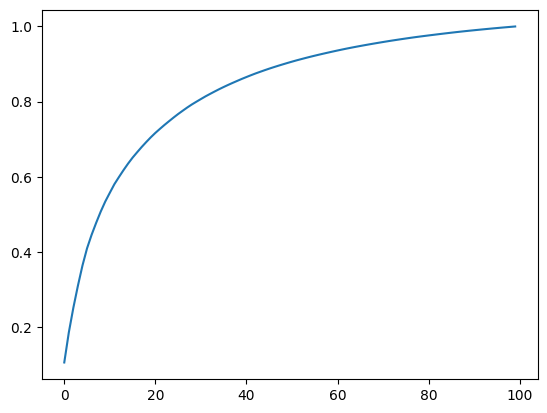

In [183]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))